##  Ophthalmology Data Analysis{-}

**Zhinoos Razavi Hesabi**

**Email address: zhinoos.razavi@gmail.com**

**Phone number: 408-550-5312**  

# Statistical Sample Exercise {-}

## Problem Description {-}

A researcher needs your statistical expertise to evaluate an intervention. The six-month intervention was to give subjects a special exercise plan. 
The researcher randomized 2,500 people to the treatment group (which receives the intervention) and another 2,500 to the control group (does not receive the intervention).  The physician wishes to evaluate the subjects’ health outcomes (weight and self-rated health) before the start of the intervention and immediately after the intervention.
The physician wants to know whether the new exercise plan will affect one’s overall health (measured by change in weight and self-rated health) differently for those receiving the new exercise plan versus those not receiving the exercise plan.


### Task 1. Create an analytic dataset by appropriately combining the 4 data files, and provide code for how you arrived at your analytic data set.  Describe your workflow. {-}

In [99]:
# Load libraries and files
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt # Visualisation 
%matplotlib inline
import seaborn.apionly as sns # Visualisation
from scipy import stats 

### Read in weight data {-}
Here, we read in weight data from the two files and combine them. 
<br><br>Starting with the treatment group first. First, combining the post and pre weights into one row. The same will be done for control group also.

In [100]:
#read the data from csv file
data3a_weight_trt = pd.read_csv("data3a_weight_trt.csv")

In [101]:
#view the first 5 rows for quickly testing if object has the right type of data in it.
data3a_weight_trt.head()

,Id,PRE_WEIGHT,POST_WEIGHT
0,1,135.2510,NaN
1,1,NaN,125.6678
2,2,154.8713,NaN
3,2,NaN,153.9882
4,3,128.1951,NaN


In [102]:
#group by Id and reseting index
data3a_weight_trt_new = data3a_weight_trt.groupby('Id').first().reset_index()

In [103]:
#view the first 5 rows for quickly testing
data3a_weight_trt_new.head()

,Id,PRE_WEIGHT,POST_WEIGHT
0,1,135.2510,125.6678
1,2,154.8713,153.9882
2,3,128.1951,115.5969
3,4,183.4600,177.0187
4,5,166.3726,163.9262


In [104]:
#check if there is any missing values in dataframe
data3a_weight_trt_new.isnull().values.any()
data3a_weight_trt_new.isnull().sum()

Id             0
PRE_WEIGHT     0
POST_WEIGHT    0
dtype: int64

In [105]:
#Return the dimensionality of the DataFrame for testing with csv data  
data3a_weight_trt_new.shape

(2500, 3)

In [106]:
data3a_weight_trt_new.describe()

,Id,PRE_WEIGHT,POST_WEIGHT
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,159.786775,150.784382
std,721.83216,21.803354,21.466418
min,1.00000,82.803790,78.090870
25%,625.75000,144.966550,135.869950
50%,1250.50000,159.066500,150.781150
75%,1875.25000,174.284100,164.941650
max,2500.00000,242.763200,221.296700


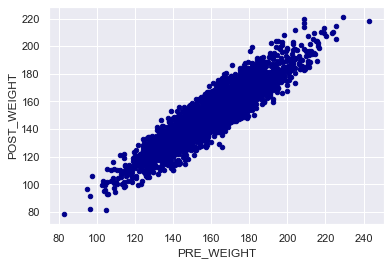

In [107]:
data3a_weight_trt_new.plot.scatter(x='PRE_WEIGHT',y='POST_WEIGHT',c='DarkBlue')
plt.show()

In the treatment group, we can see a good spread of the data.

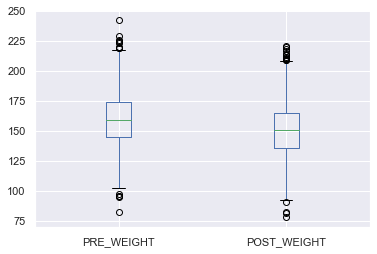

In [108]:
#boxplot
data3a_weight_trt_new.boxplot(column=['PRE_WEIGHT','POST_WEIGHT'])
plt.show()

The boxplots show that the post weight is generally lower than pre weight. <br><br>
Moving onto the control group now.

In [109]:
#read the data from csv file
data3b_weight_con = pd.read_csv("data3b_weight_con.csv")

In [110]:
#view first 5 rows of data3b_weight_con data frame
data3b_weight_con.head()

,obs_ID,PRE_WEIGHT,POST_WEIGHT
0,2501,159.7587,NaN
1,2501,NaN,158.692
2,2502,176.1611,NaN
3,2502,NaN,174.827
4,2503,181.3907,NaN


In [111]:
#group by obd_ID to add duplicate IDs in one row and then resetting index
data3b_weight_con_new = data3b_weight_con.groupby('obs_ID').first().reset_index()

In [112]:
#view first five rows of data3b_weight_con_new dataframe
data3b_weight_con_new.head()

,obs_ID,PRE_WEIGHT,POST_WEIGHT
0,2501,159.7587,158.6920
1,2502,176.1611,174.8270
2,2503,181.3907,179.9042
3,2504,175.6615,175.2032
4,2505,136.5405,137.9253


In [113]:
#check for missing values
data3b_weight_con_new.isnull().sum()

obs_ID         0
PRE_WEIGHT     0
POST_WEIGHT    0
dtype: int64

In [114]:
#test dimensionality of data3b_weight_con_new
data3b_weight_con_new.shape

(2500, 3)

In [115]:
data3b_weight_con_new.describe()

,obs_ID,PRE_WEIGHT,POST_WEIGHT
count,2500.00000,2500.000000,2500.000000
mean,3750.50000,159.923403,159.150366
std,721.83216,21.391016,21.043802
min,2501.00000,91.237920,90.156130
25%,3125.75000,145.369300,144.722825
50%,3750.50000,159.126750,158.671500
75%,4375.25000,174.413975,173.476575
max,5000.00000,232.700800,229.274700


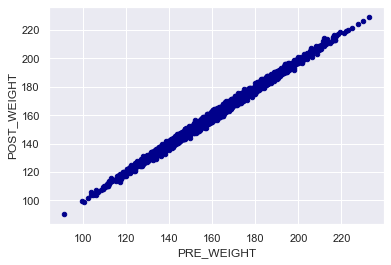

In [116]:
#scatter plot 
data3b_weight_con_new.plot.scatter(x='PRE_WEIGHT',y='POST_WEIGHT',c='DarkBlue')
plt.show()

Much less of a spread for the control group. This means that pre weight and post weight are much closely related for the control group than the treatment group. 

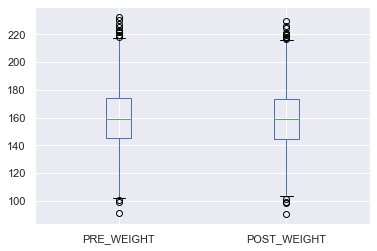

In [117]:
#boxplots
data3b_weight_con_new.boxplot(column=['PRE_WEIGHT', 'POST_WEIGHT'])
plt.show()

The medians and distributions of pre and post weight are very similar in the control group.

In [118]:
#rename column obs_ID to Id to be consistent with data3a_weight_trt_new dataframe
data3b_weight_con_new=data3b_weight_con_new.rename(columns={"obs_ID":"Id"})
data3b_weight_con_new.head()

,Id,PRE_WEIGHT,POST_WEIGHT
0,2501,159.7587,158.6920
1,2502,176.1611,174.8270
2,2503,181.3907,179.9042
3,2504,175.6615,175.2032
4,2505,136.5405,137.9253


Concatenating both dataframes to get a new dataframe with 5000 observations. 

In [119]:
#vertically and ordinal concatenate data3a_weight_trt_new with data3b_weight_con_new dataframes 
data_weight= pd.concat([data3a_weight_trt_new,data3b_weight_con_new],axis=0 )

In [120]:
data_weight.head()

,Id,PRE_WEIGHT,POST_WEIGHT
0,1,135.2510,125.6678
1,2,154.8713,153.9882
2,3,128.1951,115.5969
3,4,183.4600,177.0187
4,5,166.3726,163.9262


### Reading in data from SRH file {-}

In [121]:
#read the data from csv file
srh_data = pd.read_csv("data2_SRH.csv")

In [122]:
#view the first 5 rows for quickly testing if object has the right type of data in it.
srh_data.head()

,id,trt,TIME,SRH
0,1,1,POST,Poor
1,1,1,PRE,Good
2,2,1,PRE,Poor
3,2,1,POST,Very Poor
4,3,1,PRE,Satisfactory


Here, getting the time onto the columns rather than as a feature.

In [123]:
#creating SRH_POST AND SRH_PRE columns to replace with TIME 
srh_data['SRH_POST'] = np.where(srh_data.TIME == "POST",srh_data['SRH'],np.nan)
srh_data['SRH_PRE'] = np.where(srh_data.TIME == "PRE",srh_data['SRH'],np.nan)

In [124]:
srh_data.head()

,id,trt,TIME,SRH,SRH_POST,SRH_PRE
0,1,1,POST,Poor,Poor,NaN
1,1,1,PRE,Good,NaN,Good
2,2,1,PRE,Poor,NaN,Poor
3,2,1,POST,Very Poor,Very Poor,NaN
4,3,1,PRE,Satisfactory,NaN,Satisfactory


In [125]:
#drop TIME and SRH columns
srh_data=srh_data.drop(['TIME', 'SRH'], axis = 1) 

In [126]:
srh_data.head()

,id,trt,SRH_POST,SRH_PRE
0,1,1,Poor,NaN
1,1,1,NaN,Good
2,2,1,NaN,Poor
3,2,1,Very Poor,NaN
4,3,1,NaN,Satisfactory


Now, combining the post and pre rows into one observation by the id column.

In [127]:
#remove duplicate ids and put them in the same row, then reseting indices
srh_data_new = srh_data.groupby('id').first().reset_index()

In [128]:
srh_data_new.head()

,id,trt,SRH_POST,SRH_PRE
0,1,1,Poor,Good
1,2,1,Very Poor,Poor
2,3,1,Good,Satisfactory
3,4,1,Good,Poor
4,5,1,Poor,Poor


In [129]:
#check missing values
srh_data_new.isnull().sum()

id          0
trt         0
SRH_POST    0
SRH_PRE     0
dtype: int64

In [130]:
#rename header id to Id
srh_data_new=srh_data_new.rename(columns={"id":"Id"})
srh_data_new.head()

,Id,trt,SRH_POST,SRH_PRE
0,1,1,Poor,Good
1,2,1,Very Poor,Poor
2,3,1,Good,Satisfactory
3,4,1,Good,Poor
4,5,1,Poor,Poor


In [131]:
#check dimensionality of the dataframe
srh_data_new.shape

(5000, 4)

Merging the weight and SRH information here. This would later be merged with the demographic information later.

In [132]:
#merge two dataframes of srh_data_new and data_weight 
srh_weight= pd.merge(srh_data_new, data_weight, on='Id')
srh_weight.head()

,Id,trt,SRH_POST,SRH_PRE,PRE_WEIGHT,POST_WEIGHT
0,1,1,Poor,Good,135.2510,125.6678
1,2,1,Very Poor,Poor,154.8713,153.9882
2,3,1,Good,Satisfactory,128.1951,115.5969
3,4,1,Good,Poor,183.4600,177.0187
4,5,1,Poor,Poor,166.3726,163.9262


### Reading the demographic data {-}

In [133]:
#read the data from csv file
data1_age_sex_race = pd.read_csv("data1_age_sex_race.csv")

In [134]:
data1_age_sex_race.head()

,subject_ID,SexAge_Race
0,1,MALE41.2_White
1,2,FEMALE42.9_White
2,3,FEMALE38.5_White
3,4,FEMALE35.6_Hispanic
4,5,FEMALE48.5_White


In [135]:
#rename header subject_ID to Id
data1_age_sex_race = data1_age_sex_race.rename(columns={"subject_ID":"Id"})

In [136]:
data1_age_sex_race.head()

,Id,SexAge_Race
0,1,MALE41.2_White
1,2,FEMALE42.9_White
2,3,FEMALE38.5_White
3,4,FEMALE35.6_Hispanic
4,5,FEMALE48.5_White


In [137]:
data1_age_sex_race.shape

(5000, 2)

Using regular expressions to seperate the gender, age and race of the test subjects. 

In [138]:
#regular expression to separate out SexAge_Race attribute to Sex,Age and Race attributes(columns)
import re
data1_age_sex_race['Sex'] = data1_age_sex_race.SexAge_Race.apply(lambda x: re.search('(.*[A-Z][a-z]*)\d', x).group(1))
data1_age_sex_race['Age'] = data1_age_sex_race.SexAge_Race.apply(lambda x: re.search('.*[A-Z][a-z]*([-+]?[0-9]*\.?[0-9]+)\_', x).group(1))
data1_age_sex_race['Race'] = data1_age_sex_race.SexAge_Race.apply(lambda x: re.search('\_(.*[A-Z][a-z]*)', x).group(1))
data1_age_sex_race.tail(10)




,Id,SexAge_Race,Sex,Age,Race
4990,4991,MALE34.6_White,MALE,34.6,White
4991,4992,MALE39.4_Hispanic,MALE,39.4,Hispanic
4992,4993,MALE45.1_White,MALE,45.1,White
4993,4994,MALE50.9_Asian,MALE,50.9,Asian
4994,4995,FEMALE41.8_Hispanic,FEMALE,41.8,Hispanic
4995,4996,FEMALE34.5_Black,FEMALE,34.5,Black
4996,4997,FEMALE40.5_NA,FEMALE,40.5,NA
4997,4998,FEMALE44.1_Black,FEMALE,44.1,Black
4998,4999,FEMALE46.4_Black,FEMALE,46.4,Black
4999,5000,FEMALE49.9_Black,FEMALE,49.9,Black


Checking for incorrectly entered values.

In [139]:
data1_age_sex_race.Sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [140]:
data1_age_sex_race.Race.unique()

array(['White', 'Hispanic', 'NA', 'Black', 'Asian'], dtype=object)

In [141]:
data1_age_sex_race=data1_age_sex_race.drop(['SexAge_Race'], axis = 1) 
data1_age_sex_race.head()

,Id,Sex,Age,Race
0,1,MALE,41.2,White
1,2,FEMALE,42.9,White
2,3,FEMALE,38.5,White
3,4,FEMALE,35.6,Hispanic
4,5,FEMALE,48.5,White


In [142]:
df= pd.merge(data1_age_sex_race, srh_weight, on='Id')
df.head()

,Id,Sex,Age,Race,trt,SRH_POST,SRH_PRE,PRE_WEIGHT,POST_WEIGHT
0,1,MALE,41.2,White,1,Poor,Good,135.2510,125.6678
1,2,FEMALE,42.9,White,1,Very Poor,Poor,154.8713,153.9882
2,3,FEMALE,38.5,White,1,Good,Satisfactory,128.1951,115.5969
3,4,FEMALE,35.6,Hispanic,1,Good,Poor,183.4600,177.0187
4,5,FEMALE,48.5,White,1,Poor,Poor,166.3726,163.9262


In [143]:
df.isnull().sum()      # no missing data

Id             0
Sex            0
Age            0
Race           0
trt            0
SRH_POST       0
SRH_PRE        0
PRE_WEIGHT     0
POST_WEIGHT    0
dtype: int64

In [144]:
df.shape

(5000, 9)

### Task2.Explore and analyze the data as you see fit. Please show at least one plot. {-}

### Exploratory Data Analysis {-}

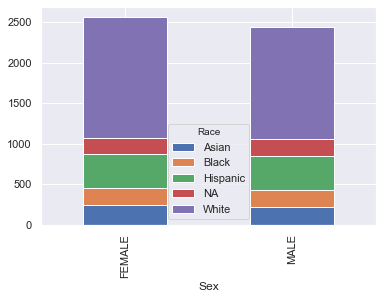

In [145]:
count_df = pd.crosstab(df.Sex, df.Race) # cross tabulation of gender and race
count_df.plot(kind='bar', stacked=True) # genders pretty evenly divided in all races except white 
                                        # - more white females present
    plt.show()

Calculating the change in weights of the test subjects after the treatment. Note that negative values mean weight loss and would be considered the "healthier" option. 

In [146]:
df['Weight_diff'] = df['POST_WEIGHT'] - df['PRE_WEIGHT']   # negative means weight loss - good
df.head()

,Id,Sex,Age,Race,trt,SRH_POST,SRH_PRE,PRE_WEIGHT,POST_WEIGHT,Weight_diff
0,1,MALE,41.2,White,1,Poor,Good,135.2510,125.6678,-9.5832
1,2,FEMALE,42.9,White,1,Very Poor,Poor,154.8713,153.9882,-0.8831
2,3,FEMALE,38.5,White,1,Good,Satisfactory,128.1951,115.5969,-12.5982
3,4,FEMALE,35.6,Hispanic,1,Good,Poor,183.4600,177.0187,-6.4413
4,5,FEMALE,48.5,White,1,Poor,Poor,166.3726,163.9262,-2.4464


Checking wrongly entered values in SRH

In [147]:
df.SRH_POST.unique()

array(['Poor', 'Very Poor', 'Good', 'Excellent', 'Satisfactory',
       'Excellent ', 'Very  Poor'], dtype=object)

In [148]:
df.SRH_PRE.unique()

array(['Good', 'Poor', 'Satisfactory', 'Excellent', 'Very Poor',
       'Excellent ', 'Very  Poor'], dtype=object)

Remove values that were entered wrong.

In [149]:
df=df.replace({'SRH_PRE': {'Excellent ':'Excellent', 'Very  Poor' : 'Very Poor'}, 'SRH_POST': {'Excellent ':'Excellent', 'Very  Poor': 'Very Poor' }})
df.head()


,Id,Sex,Age,Race,trt,SRH_POST,SRH_PRE,PRE_WEIGHT,POST_WEIGHT,Weight_diff
0,1,MALE,41.2,White,1,Poor,Good,135.2510,125.6678,-9.5832
1,2,FEMALE,42.9,White,1,Very Poor,Poor,154.8713,153.9882,-0.8831
2,3,FEMALE,38.5,White,1,Good,Satisfactory,128.1951,115.5969,-12.5982
3,4,FEMALE,35.6,Hispanic,1,Good,Poor,183.4600,177.0187,-6.4413
4,5,FEMALE,48.5,White,1,Poor,Poor,166.3726,163.9262,-2.4464


In [150]:
df.SRH_PRE.unique()

array(['Good', 'Poor', 'Satisfactory', 'Excellent', 'Very Poor'],
      dtype=object)

In [151]:
df.SRH_POST.unique()

array(['Poor', 'Very Poor', 'Good', 'Excellent', 'Satisfactory'],
      dtype=object)

Here, the SRH values are converted from text to a number for easier processing later on. It is done as data on ordinal scale.

In [152]:
dic = {'Very Poor':1, 'Poor':2 , 'Satisfactory':3, 'Good':4, 'Excellent':5}
df= df.replace({"SRH_POST": dic})
df= df.replace({"SRH_PRE": dic})
df.head()

,Id,Sex,Age,Race,trt,SRH_POST,SRH_PRE,PRE_WEIGHT,POST_WEIGHT,Weight_diff
0,1,MALE,41.2,White,1,2,4,135.2510,125.6678,-9.5832
1,2,FEMALE,42.9,White,1,1,2,154.8713,153.9882,-0.8831
2,3,FEMALE,38.5,White,1,4,3,128.1951,115.5969,-12.5982
3,4,FEMALE,35.6,Hispanic,1,4,2,183.4600,177.0187,-6.4413
4,5,FEMALE,48.5,White,1,2,2,166.3726,163.9262,-2.4464


Getting an SRH score -- this is the change in SRH on the previously defined scale. Here positive values are an improvement in health. 

In [153]:
df['SRH_SCORE'] = df['SRH_POST'] - df['SRH_PRE']     # positive values are good
df.head()

,Id,Sex,Age,Race,trt,SRH_POST,SRH_PRE,PRE_WEIGHT,POST_WEIGHT,Weight_diff,SRH_SCORE
0,1,MALE,41.2,White,1,2,4,135.2510,125.6678,-9.5832,-2
1,2,FEMALE,42.9,White,1,1,2,154.8713,153.9882,-0.8831,-1
2,3,FEMALE,38.5,White,1,4,3,128.1951,115.5969,-12.5982,1
3,4,FEMALE,35.6,Hispanic,1,4,2,183.4600,177.0187,-6.4413,2
4,5,FEMALE,48.5,White,1,2,2,166.3726,163.9262,-2.4464,0


In [154]:
df.describe()

,Id,trt,SRH_POST,SRH_PRE,PRE_WEIGHT,POST_WEIGHT,Weight_diff,SRH_SCORE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,0.50000,3.230000,2.976200,159.855089,154.967374,-4.887715,0.253800
std,1443.520003,0.50005,1.534917,1.579282,21.596117,21.661830,7.645269,1.201363
min,1.000000,0.00000,1.000000,1.000000,82.803790,78.090870,-38.801200,-4.000000
25%,1250.750000,0.00000,2.000000,1.000000,145.126975,140.109450,-9.103075,0.000000
50%,2500.500000,0.50000,3.000000,3.000000,159.113800,154.624650,-1.969600,0.000000
75%,3750.250000,1.00000,5.000000,5.000000,174.384500,169.540225,0.031925,1.000000
max,5000.000000,1.00000,5.000000,5.000000,242.763200,229.274700,18.347900,4.000000


In [155]:
#
srh_rate=((srh_score_count / srh_score_count.groupby('trt').sum())*100)
srh_rate

trt  SRH_SCORE
0     0           58.28
     -1           11.72
      1           11.08
     -2            7.12
      2            5.88
      3            3.32
     -3            2.04
      4            0.32
     -4            0.24
1     0           52.44
      2           16.56
      1           13.40
     -1            7.64
      3            5.64
     -2            2.44
     -3            1.20
      4            0.64
     -4            0.04
Name: SRH_SCORE, dtype: float64

Above shows the number of people showing the SRH_SCOREs as a percentage of the group total.

The below distributions of SRh scores of test subjects do not normal. There is high kurtosis. 

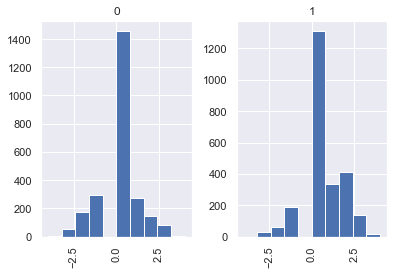

In [156]:
#plot SRH_SCORE histogram for both treatmen and controled group
sns.set() 
df.hist(by='trt',column = 'SRH_SCORE')
plt.show()

In [157]:
df[df.Weight_diff < 0].groupby('trt').count()[['Weight_diff']]

,Weight_diff
trt,
0,1670
1,2062


In [158]:
df1=df[df.Weight_diff > 0].groupby('trt').count()[['Weight_diff']]
df1

,Weight_diff
trt,
0,830
1,438


In [159]:
df[df.Weight_diff == 0].groupby('trt').count()[['Weight_diff']]

,Weight_diff
trt,


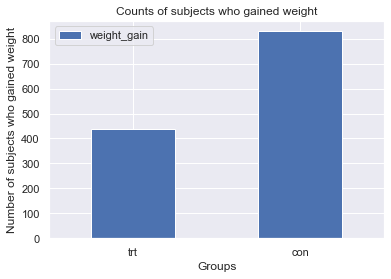

In [160]:
weight_gain = pd.DataFrame({'group':['trt', 'con'], 'weight_gain':[438, 830]})  # counts of subjects who gained weight
ax = weight_gain.plot.bar(x = 'group', y = 'weight_gain', rot=0)
 
# plot labels
plt.title('Counts of subjects who gained weight')
plt.xlabel('Groups')
plt.ylabel('Number of subjects who gained weight')

plt.show()

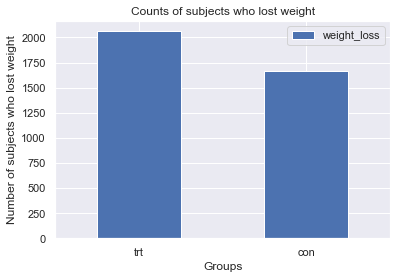

In [161]:
weight_loss = pd.DataFrame({'group':['trt', 'con'], 'weight_loss':[2062, 1670]})   # counts of subjects who lost weight
ax = weight_loss.plot.bar(x = 'group', y = 'weight_loss', rot=0)

# labels for plot
plt.title('Counts of subjects who lost weight')
plt.xlabel('Groups')
plt.ylabel('Number of subjects who lost weight')

plt.show()

In [162]:
df['Weight_diff'].corr(df['SRH_SCORE'])  # correlation between the change in SRH and weights

-0.21387314438702018

Negative correlation here is expected. This is because negative weight difference and positive change in SRH are associated with better health (or treatment effect). 

### Outliers wrt weight difference {-}

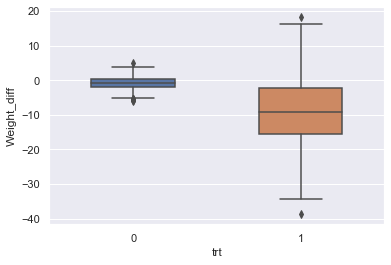

In [163]:
sns.boxplot(y = 'Weight_diff', x = 'trt', data = df, width = 0.50)

Clearly, the treatment group has a lower median showing more weight loss. They are also showing a much wider spread. There are a few outliers on both the treatment group and the control group. Let's remove those by standard boxplot. 

In [164]:
# find lower and upper bounds of standard boxplot for control group
Q1_con, Q3_con = np.percentile(df.loc[df.trt == 0, 'Weight_diff'], [25, 75])
IQR_con = Q3_con - Q1_con
lower_bound_con = Q1_con - (1.5 * IQR_con) 
upper_bound_con = Q3_con + (1.5 * IQR_con) 

print("Q1              :", round(Q1_con, 3), 
      "\nQ3              :", round(Q3_con, 3), 
      "\nIQR             :", round(IQR_con, 3), 
      "\nLower Bound     :", round(lower_bound_con, 3), 
      "\nUpper Bound     :", round(upper_bound_con, 3))

Q1              : -1.879 
Q3              : 0.408 
IQR             : 2.287 
Lower Bound     : -5.309 
Upper Bound     : 3.838


In [165]:
# find lower and upper bounds of standard boxplot for control group
Q1_trt, Q3_trt = np.percentile(df.loc[df.trt == 1, 'Weight_diff'], [25, 75])
IQR_trt = Q3_trt - Q1_trt
lower_bound_trt = Q1_trt - (1.5 * IQR_trt) 
upper_bound_trt = Q3_trt + (1.5 * IQR_trt) 

print("Q1              :", round(Q1_trt, 3), 
      "\nQ3              :", round(Q3_trt, 3), 
      "\nIQR             :", round(IQR_trt, 3), 
      "\nLower Bound     :", round(lower_bound_trt, 3), 
      "\nUpper Bound     :", round(upper_bound_trt, 3))

Q1              : -15.681 
Q3              : -2.372 
IQR             : 13.309 
Lower Bound     : -35.645 
Upper Bound     : 17.592


The calculated values seem to match well with the boxplots plotted. Let's flag and remove these.

In [166]:
def flag_outliers(row, upper_bound, lower_bound):
    index = df[df['Id'] == row.Id].index.values.astype(int)[0]  # find index
    
    # if weight outside of the bounds, flag as outlier
    if ((row.Weight_diff > upper_bound) or (row.Weight_diff < lower_bound)):
        df.at[index, 'outlier_flag'] = True

    return None

df['outlier_flag'] = False
df[df.trt == 0].apply(flag_outliers, args = (upper_bound_con, lower_bound_con), axis = 1);    # apply to control
df[df.trt == 1].apply(flag_outliers, args = (upper_bound_trt, lower_bound_trt), axis = 1);    # apply to treatment

In [167]:
df[df.outlier_flag]    # list all outliers

,Id,Sex,Age,Race,trt,SRH_POST,SRH_PRE,PRE_WEIGHT,POST_WEIGHT,Weight_diff,SRH_SCORE,outlier_flag
1810,1811,MALE,36.1,NA,1,4,4,165.5593,126.7581,-38.8012,0,True
2067,2068,FEMALE,25.5,White,1,5,5,181.3255,199.6734,18.3479,0,True
2591,2592,MALE,32.7,Hispanic,0,4,4,156.9004,151.2559,-5.6445,0,True
2851,2852,MALE,39.8,White,0,3,3,149.4094,143.9075,-5.5019,0,True
3628,3629,MALE,55.5,White,0,1,1,165.1667,159.7706,-5.3961,0,True
3798,3799,MALE,42,NA,0,1,1,156.5676,150.7558,-5.8118,0,True
4716,4717,MALE,38.3,Black,0,3,2,178.2512,172.5387,-5.7125,1,True
4746,4747,MALE,53.7,White,0,1,1,162.0296,156.6575,-5.3721,0,True
4748,4749,FEMALE,56,Hispanic,0,1,1,152.1057,156.9378,4.8321,0,True
4839,4840,MALE,31.3,White,0,5,5,197.9854,191.8694,-6.1160,0,True


In [168]:
# deleting the outliers
df = df.drop(df[df.outlier_flag == True].index)

df.drop(['outlier_flag'], axis = 1, inplace = True)

len(df)    # 12 outliers dropped - 4988 expected

4988

### Outliers wrt SRH difference {-}

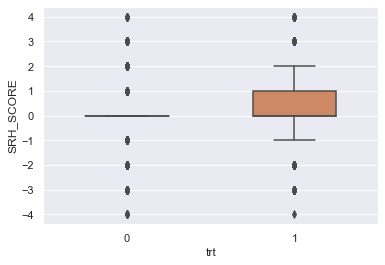

In [169]:
sns.boxplot(y = 'SRH_SCORE', x = 'trt', data = df, width = 0.50)

There are few outliers. But, since this is a categorical variable, it does not make much sense to delete these. 

### Hypothesis testing : Checking if Means of Weight Differences are Equal {-}

#### First method {-}

In [170]:
weight_diff_trt = df.loc[df.trt == 1, 'Weight_diff']    # weight diff of treatment group
weight_diff_con = df.loc[df.trt == 0, 'Weight_diff']    # weight diff of control group

(array([ 13.,  98., 198., 441., 492., 472., 422., 252.,  98.,  12.]),
 array([-34.4885 , -29.42775, -24.367  , -19.30625, -14.2455 ,  -9.18475,
         -4.124  ,   0.93675,   5.9975 ,  11.05825,  16.119  ]),
 <a list of 10 Patch objects>)

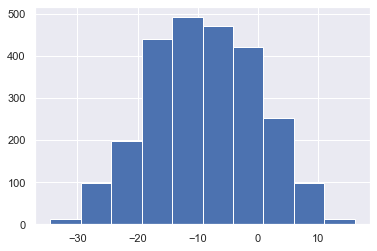

In [171]:
plt.hist(weight_diff_trt)

(array([ 35.,  89., 232., 364., 526., 488., 409., 228.,  87.,  32.]),
 array([-5.2572 , -4.35884, -3.46048, -2.56212, -1.66376, -0.7654 ,
         0.13296,  1.03132,  1.92968,  2.82804,  3.7264 ]),
 <a list of 10 Patch objects>)

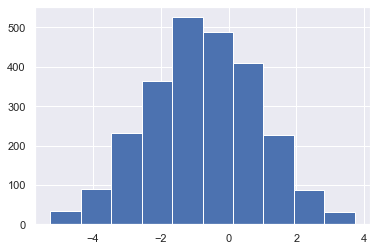

In [172]:
plt.hist(weight_diff_con)

In [173]:
stats.bartlett(weight_diff_trt, weight_diff_con)    # checking equality of variance - normal - bartlett used

BartlettResult(statistic=5168.372554037757, pvalue=0.0)

The null of equal variances are rejected. The variances are unequal. Therefore, we cannot use standard t-test. Welch's t-test being used.

In [174]:
stats.ttest_ind(weight_diff_trt, weight_diff_con, equal_var = False)   # equal_var = False makes it Welch's t-test

Ttest_indResult(statistic=-45.394268586115, pvalue=0.0)

The null of equal means is rejected. Therefore, the means of weight differences are unequal.

#### Second Method {-}
Another approach that can be used is to check if the means of the weights of the same people before and after the treatment are similar or not. This can be done using paired-sample t-tests. This has to be repeated for both control group and treatment group.

In [175]:
df.head()

,Id,Sex,Age,Race,trt,SRH_POST,SRH_PRE,PRE_WEIGHT,POST_WEIGHT,Weight_diff,SRH_SCORE
0,1,MALE,41.2,White,1,2,4,135.2510,125.6678,-9.5832,-2
1,2,FEMALE,42.9,White,1,1,2,154.8713,153.9882,-0.8831,-1
2,3,FEMALE,38.5,White,1,4,3,128.1951,115.5969,-12.5982,1
3,4,FEMALE,35.6,Hispanic,1,4,2,183.4600,177.0187,-6.4413,2
4,5,FEMALE,48.5,White,1,2,2,166.3726,163.9262,-2.4464,0


In [176]:
trt_before_weight = df.loc[df.trt == 1, 'PRE_WEIGHT']   # before weights for treatment group
trt_after_weight = df.loc[df.trt == 1, 'POST_WEIGHT']   # after weights for treatment group

con_before_weight = df.loc[df.trt == 0, 'PRE_WEIGHT']   # before weights for control group
con_after_weight = df.loc[df.trt == 0, 'POST_WEIGHT']   # after weights for control group

(array([  5.,  35., 179., 494., 697., 617., 317., 123.,  29.,   2.]),
 array([ 82.80379 ,  98.799731, 114.795672, 130.791613, 146.787554,
        162.783495, 178.779436, 194.775377, 210.771318, 226.767259,
        242.7632  ]),
 <a list of 10 Patch objects>)

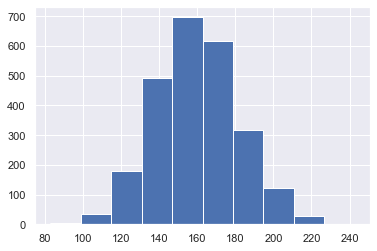

In [177]:
plt.hist(trt_before_weight)

(array([  4.,  39., 165., 391., 599., 637., 409., 192.,  46.,  16.]),
 array([ 78.09087 ,  92.411453, 106.732036, 121.052619, 135.373202,
        149.693785, 164.014368, 178.334951, 192.655534, 206.976117,
        221.2967  ]),
 <a list of 10 Patch objects>)

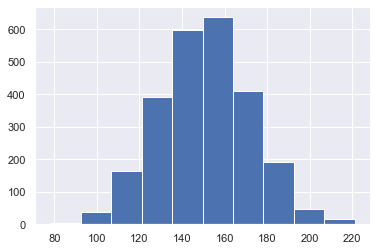

In [178]:
plt.hist(trt_after_weight)

All the above seems reasonably normal. We can use paired t-test.

In [179]:
stats.ttest_rel(trt_before_weight, trt_after_weight)           # t-test to compare the means of two distributions

Ttest_relResult(statistic=50.39316529644663, pvalue=0.0)

The null of no difference between the means of weight before and after the treatment is rejected for the treatment group. Therefore, we have an improvement after the treatment. <br><br>
Let us also check the same for control group.

(array([  8.,  58., 207., 455., 648., 556., 356., 144.,  50.,   8.]),
 array([ 91.23792 , 105.384208, 119.530496, 133.676784, 147.823072,
        161.96936 , 176.115648, 190.261936, 204.408224, 218.554512,
        232.7008  ]),
 <a list of 10 Patch objects>)

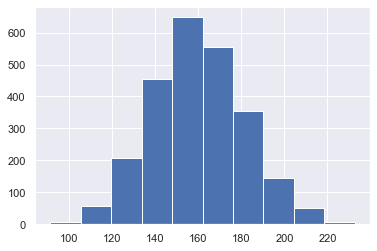

In [180]:
plt.hist(con_before_weight)

(array([  7.,  50., 187., 413., 645., 573., 386., 168.,  50.,  11.]),
 array([ 90.15613 , 104.067987, 117.979844, 131.891701, 145.803558,
        159.715415, 173.627272, 187.539129, 201.450986, 215.362843,
        229.2747  ]),
 <a list of 10 Patch objects>)

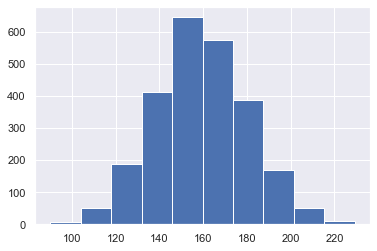

In [181]:
plt.hist(con_after_weight)

In [182]:
stats.ttest_rel(con_before_weight, con_after_weight)

Ttest_relResult(statistic=23.144976002654452, pvalue=1.6773248888145785e-107)

The second method shows that there is significant difference between the before weight and after weight of the control group also. But, note that the test statistic is much smaller here than for the treatment group. 

#### Conclusion {-}

In [183]:
mean_wt_trt = np.mean(weight_diff_trt)
mean_wt_con = np.mean(weight_diff_con)

print(mean_wt_trt, mean_wt_con)

-9.001413294635709 -0.7578227951807225


The mean difference in weight for the treatment group is lower that the mean difference for control group. This means that the treatment makes a statistically significant difference in weight loss of individuals.

### Hypothesis testing : Checking if Means of SRH Differences are Equal {-}

#### First method {-}

In [184]:
srh_diff_trt = df.loc[df.trt == 1, 'SRH_SCORE']
srh_diff_con = df.loc[df.trt == 0, 'SRH_SCORE']

(array([1.000e+00, 3.000e+01, 6.100e+01, 1.910e+02, 0.000e+00, 1.309e+03,
        3.350e+02, 4.140e+02, 1.410e+02, 1.600e+01]),
 array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <a list of 10 Patch objects>)

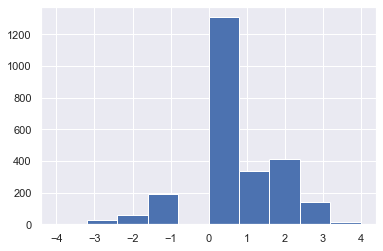

In [185]:
plt.hist(srh_diff_trt)

(array([   6.,   51.,  178.,  292.,    0., 1449.,  276.,  147.,   83.,
           8.]),
 array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <a list of 10 Patch objects>)

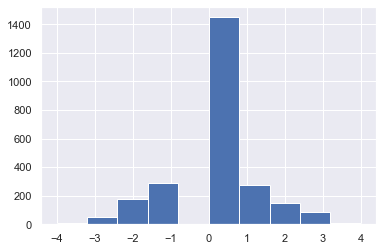

In [186]:
plt.hist(srh_diff_con)

In [187]:
stats.levene(srh_diff_trt, srh_diff_con)        # checking equality of variance - not normal - levene used

LeveneResult(statistic=29.827567975932865, pvalue=4.9513928482097794e-08)

The null of equal variances are rejected. The variances are unequal. Therefore, we cannot use standard t-test. Welch's t-test being used.

In [188]:
stats.ttest_ind(srh_diff_trt, srh_diff_con, equal_var = False)   # equal_var = False makes it Welch's t-test

Ttest_indResult(statistic=14.607440268037356, pvalue=2.3758005555257883e-47)

The null of equal means is rejected. Therefore, the means of weight differences are unequal.

#### Second method {-}
In this second method, we first make a column which is true if the subject reported an improvement in their health but is false if they reported no difference or a deterioration in health. We make a cross tab of that against treatment to get a contingency table. A chi square test of independence is then conducted on this table to find if there is some dependence between whether the subject got treatment and whether they reported improvement in health.

In [189]:
df['SRH_improve'] = (df['SRH_SCORE'] > 0)     # new column - true if improvement; false otherwise
df.head()

,Id,Sex,Age,Race,trt,SRH_POST,SRH_PRE,PRE_WEIGHT,POST_WEIGHT,Weight_diff,SRH_SCORE,SRH_improve
0,1,MALE,41.2,White,1,2,4,135.2510,125.6678,-9.5832,-2,False
1,2,FEMALE,42.9,White,1,1,2,154.8713,153.9882,-0.8831,-1,False
2,3,FEMALE,38.5,White,1,4,3,128.1951,115.5969,-12.5982,1,True
3,4,FEMALE,35.6,Hispanic,1,4,2,183.4600,177.0187,-6.4413,2,True
4,5,FEMALE,48.5,White,1,2,2,166.3726,163.9262,-2.4464,0,False


In [190]:
cross_tab = pd.crosstab(df.trt, df.SRH_improve)      # contingency table of treatment against SRH improvement
cross_tab

SRH_improve,False,True
trt,,
0,1976,514
1,1592,906


In [191]:
stats.chi2_contingency(cross_tab)

(148.76261582170275,
 3.231690075292425e-34,
 1,
 array([[1781.13873296,  708.86126704],
        [1786.86126704,  711.13873296]]))

The null of the subject undergoing treatment and an improvement in their health being independent is rejected. This means that there is statistical significance between the two. Which shows that the treatment had an effect on the self reported health of the individuals. 

#### Conclusion {-}

In [192]:
mean_srh_trt = np.mean(srh_diff_trt)
mean_srh_con = np.mean(srh_diff_con)

print(mean_srh_trt, mean_srh_con)

0.4975980784627702 0.010441767068273093


There is almost no difference in the SRH reported of the control group. But, there is improvement in the SRH of the treatment group. The treatment makes a statistically significant difference in the SRH of individuals. 

### Task 3. Explain what you did in #2 and tell us why you decided on that method.  {-}
**answer)** After exploratory data analysis, in task 2, hypothesis tests were done to check if there was improvement in health of the treatment group compared to the control group. <br>
It was seen that there was statistically significant difference in the means of the weight differences of treatment group and control group. It was also seen that there was significant difference between the before weight and after weight in the treatment group. These t-tests were done to check the validity of the numerical data.<br>
Further, it was seen that there was statistically significant difference in the SRH scores (SRH differences before and after the test) of the treatment group and control group. A t-test was used here after converting the SRH indicators to numbers. Apart from this, the subjects were categorized into two - one group who reported health improvement and the other that did not. A chi sqaure test was done to test dependence between the treatment variable and health improvement variable which showed that treatment led to better health. This test was done as the data was categorized.

### Task 4. Explain the results to the investigator. Please assume the investigator has limited statistical knowledge. Tell her whether there is or is not a treatment effect and if so, how the two groups differ with respect to their weight profiles and SRH over time. {-}

**answer)** Overall, there is treatment effect - the group undergoing treatment is showing significant results both in weight loss as well as in Self Reported Health indicators. After treatment, the weights of the treatment group has decreased by 9kg on average while the weights of the control group has only gone down up 0.8kg. Similarly, the test subjects in the treatment group report themselves, on average, to be healthier that they were before the treatment while the test subjects in the control group report themselves, on average, to be just as healthy both before and after the treatment.

### Task5. What if the investigator wanted to evaluate 16 additional outcomes (in addition to weight and SRH)? She is curious to see if the exercise regime has an impact on body fat %, mental well-being, bone density, etc... She intends to publish the results in a high-impact journal. How would you respond to this? {-}

**answer)** Similar statistical methods can be applied to check if the treatment makes statistically significant differences in any of those metrics as well. But, be wary of the fact that some of these metrics might show statistically significant treatment effect even when the treatment does not really make a difference simply because of randomness. It is generally advisable in research scenarios to only test the metrics which a subject matter expert from the field feels could be affected by the treatment.

### Task6. What if the two groups (treatment and control) were not randomized? How might you evaluate the intervention now? What additional information might you require, and which methods could you use? What would be your limitations? {-}

**answer)** If the groups were not randomized, the results are not as accurate. We need more information on what the confounder is. For example, the lack of randomness could be that all males were placed in treatment groups and all females were placed in control group. Or, it could be that people from same houselholds were placed in same group. If only a small number of subjects are affected by this, the best approach is to drop the subjects that were not assigned randomly and use the same methods as above. If there is a high number of subjects affected, it might be worth considering ANCOVA (Analysis of Covariance). ANCOVA can be used to control for confounders. <br>